In [16]:
# some useful modules
import numpy as np
import matplotlib.pyplot as plt
import subprocess
import matplotlib.animation as animation
from matplotlib.ticker import LogLocator
import matplotlib.ticker as ticker
from matplotlib.pyplot import cm
import re
# our custom specdist module where all our SD computations are done
import specdist as sd


# let's make a directory wher we save our figures today:
path_to_figures = sd.path_to_sd_projects + "figures/"
subprocess.call(['mkdir','-p',path_to_figures])
print("figure directory: %s"%path_to_figures)


# some labels for the figures
label_intensity = "Intensity, "+r'$\Delta I_x \quad [\mathrm{Jy/sr}]$'
label_scaled_frequency = "Scaled Frequency, "+ r'$x=h\nu/k_{_\mathrm{B}}T_{_\mathrm{CMB}}$'
label_y_firas = r'$y_\mathrm{COBE}=1.5\times 10^{-5}$'
label_mu_firas = r'$\mu_\mathrm{COBE}=9\times 10^{-5}$'
label_redshift = 'Redshift, '+r'$z$'
label_xe = 'Free Electron Fraction, '+r'$X_\mathrm{e}$'

# some conversion factors
xinj_to_mass = 4.698e-4 #m in ev = 4.698e-4 xinj
xinj_to_Einj = 4.698e-4/2. #Einj = 4.698e-4/2 xinj
mass_to_Einj = 1./2.

figure directory: /Users/boris/Desktop/SPECDISTDIR/figures/


# Plot standard mu and y distortions

In [13]:
# get the distortions from sd module:
Tcmb = 2.726
x_array = np.logspace(-8,2,1000)
firas = sd.firas()
y_dist = sd.GetYSpecDistAtTandX(firas.firas_y_1996_95_cl,Tcmb,x_array)*1e6
mu_dist = sd.GetMuSpecDistAtTandX_chluba(firas.firas_mu_1996_95_cl,Tcmb,x_array)*1e6

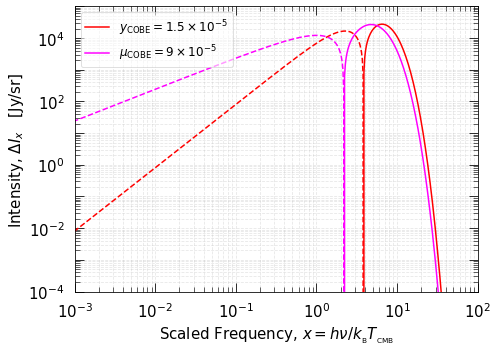

In [15]:
# plot the distortions:


fig, ax = plt.subplots(1,1,figsize=(7,5))
label_size = 15
title_size = 15
legend_size = 25
handle_length = 1.5


x_min = 1e-3
x_max = 1e2

ymin = 1e-10*1e6
ymax = 1e-1*1e6

ax.set_xlim(x_min,x_max)
ax.set_ylim(ymin,ymax)
ax.set_xscale('log')
ax.set_yscale('log')


ax.set_ylabel(label_intensity,size=title_size)
ax.set_xlabel(label_scaled_frequency,size=title_size)
ax.yaxis.set_label_coords(-.12,0.5)

ax.plot(x_array,y_dist,c='r',alpha = 1.,label=label_y_firas)
ax.plot(x_array,-y_dist,c='r',alpha = 1.,ls='--')


ax.plot(x_array,mu_dist,c='magenta',alpha = 1.,label=label_mu_firas)
ax.plot(x_array,-mu_dist,c='magenta',alpha = 1.,ls='--')

ax.yaxis.set_major_locator(LogLocator(numticks=15)) 
ax.yaxis.set_minor_locator(LogLocator(numticks=15,subs=np.arange(2,10))) 
for label in ax.yaxis.get_ticklabels()[::2]:
    label.set_visible(False) #(3)

ax.yaxis.set_tick_params(right='on',which='minor',direction='in',length=5)
ax.xaxis.set_tick_params(top='on',which='minor',direction='in',length=5)
ax.yaxis.set_tick_params(right='on',which='major',direction='in',length=9,labelsize=label_size,pad=10)
ax.xaxis.set_tick_params(top='on',which='major',direction='in',length=9,labelsize=label_size,pad=10)


ax.xaxis.set_major_locator(LogLocator(numticks=15)) 
ax.xaxis.set_minor_locator(LogLocator(numticks=15,subs=np.arange(2,10)))
# for label in ax.xaxis.get_ticklabels()[::2]:
#     label.set_visible(False) #(3)

ax.grid( b=True, which="both", alpha=0.3, linestyle='--')

ax.legend(loc=2,ncol=1,frameon=True,framealpha=0.6,fontsize = 12)

fig.tight_layout()
plt.savefig(path_to_figures + '/standard_mu_and_y_dist.pdf')
plt.show()
plt.close(fig)

# Run CosmoTherm in parallel and plot results

In [2]:

# setting up the parameters:
ct = sd.cosmotherm()
ct.ct_Gamma_dec = 1e-14

ct.ct_Drho_rho_dec = 3.e-5
ct.ct_pi_energy_norm = 2
ct.ct_include_pi = 1 
ct.ct_evolve_Xe = 1
ct.ct_zend = 1e-2
ct.ct_zlate = 1e3
ct.ct_reionisation_model = 0
ct.ct_include_collisions = 0
ct.ct_emission_absorption_mode = 0
ct.ct_lyc = 1

ct.ct_npts = 3000


ct.ct_T0 = 2.7255
ct.ct_Yp = 0.245407
ct.ct_N_eff = 3.046
ct.ct_Omega_m = 0.312331
ct.ct_Omega_b = 0.0491137
ct.ct_h = 0.675422

ct.save_Xe = 'yes'


# defining which parameter values we want to compute:
p_name = 'photon injection x_dec'
xinjs = [5e-8,5e-5,5e-2,5e1,5e4]
p_array = xinjs

# the directory name fo the final spectra
ct.save_dir_name = 'many_xinj'


args = {}
args['param_values_array'] = p_array
args['param_name'] = p_name
args['save_spectra'] = 'yes'


# do the run:
# sould take a couple of minutes (~5 minutes on my laptop)
R = ct.run_cosmotherm_parallel(**args)

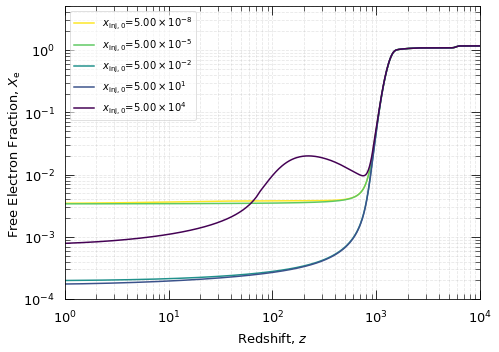

In [9]:

fig, ax = plt.subplots(1,1,figsize=(7,5))
label_size = 13
title_size = 13
legend_size = 25
handle_length = 0.5



ymin=1e-4
ymax = 5e0
x_max = 1e4
x_min = 1
ax.set_xlim(x_min,x_max)
ax.set_ylim(ymin,ymax)
ax.set_xscale('log')
ax.set_yscale('log')


ax.set_xlabel(label_redshift,size=title_size)
ax.set_ylabel(label_xe,size=title_size)
ax.yaxis.set_label_coords(-.1,0.5)


ax.yaxis.set_major_locator(LogLocator(numticks=15)) 
ax.yaxis.set_minor_locator(LogLocator(numticks=15,subs=np.arange(2,10))) 
for label in ax.yaxis.get_ticklabels()[::2]:
    label.set_visible(True) 

ax.yaxis.set_tick_params(right='on',which='minor',direction='in',length=5)
ax.xaxis.set_tick_params(top='on',which='minor',direction='in',length=5)
ax.yaxis.set_tick_params(right='on',which='major',direction='in',length=9,labelsize=label_size,pad=10)
ax.xaxis.set_tick_params(top='on',which='major',direction='in',length=9,labelsize=label_size,pad=10)

# manipulate x-axis ticks and labels
ax.xaxis.set_major_locator(LogLocator(numticks=15)) 
ax.xaxis.set_minor_locator(LogLocator(numticks=15,subs=np.arange(2,10))) 
for label in ax.xaxis.get_ticklabels()[::2]:
    label.set_visible(True) 

ax.grid( b=True, which="both", alpha=0.3, linestyle='--')
i = 0
color=iter(cm.viridis(np.linspace(1,0,len(xinjs))))
for x in xinjs:
    ax.plot(R[i]['Xe_redshifts'],R[i]['Xe_values'],label=r'$x_\mathrm{inj,0}$='+sd.scientific_notation(x),c=next(color))
    i+=1






ax.legend(loc=2,ncol=1,frameon=True,framealpha=0.6,fontsize = 10)

fig.tight_layout()
plt.savefig(path_to_figures + '/ct_Xe_many_xinjs.pdf')
plt.show()
plt.close(fig)

In [10]:
# we have also access to the Distortions:
R[0]['DI']

array([7.38601365e-10, 7.62290443e-10, 7.86739297e-10, ...,
       2.11194839e-51, 1.30353105e-51, 8.03216351e-52])

In [11]:
sd.path_to_ct_spectra_results

'/Users/boris/Desktop/SPECDISTDIR/specdist/specdist/ct_spectra'

In [22]:
# easiest when we work with figures is to re-access the results
# from where the files have been saved:
dir_name = 'many_xinj'

fname = sd.path_to_ct_spectra_results + '/'+ dir_name + '/spectra_'+dir_name+'_Xe_values_ct.txt'
Xe = []
with open(fname) as f:
    for line in f:
        x = line.strip()
        if x:
            if not x.startswith("#"):
                l = re.split(r'[\t]',x)
                Xe.append(l)
for i in range(len(Xe)):
    Xe[i] = [float(zz) for zz in Xe[i]]
fname = sd.path_to_ct_spectra_results +  '/'+ dir_name + '/spectra_'+dir_name+'_Xe_redshifts_ct.txt'
z = []
with open(fname) as f:
    for line in f:
        x = line.strip()
        if x:
            if not x.startswith("#"):
                l = re.split(r'[\t]',x)
                z.append(l)
for i in range(len(z)):
    z[i] = [float(zz) for zz in z[i]]

fname =sd.path_to_ct_spectra_results +  '/'+ dir_name + '/spectra_'+dir_name+'_xinj_ct.txt'
xinj = []
with open(fname) as f:
    for line in f:
        x = line.strip()
        if x:
            if not x.startswith("#"):
                l = re.split(r'[\t]',x)
                xinj.append(l)
for i in range(len(z)):
    xinj[i] = [float(zz) for zz in xinj[i]]
    
fname = sd.path_to_ct_spectra_results +  '/'+ dir_name + '/spectra_'+dir_name+'_x_ct.txt'
x_ct = []
with open(fname) as f:
    for line in f:
        x = line.strip()
        if x:
            if not x.startswith("#"):
                l = re.split(r'[\t]',x)
                x_ct.append(l)
for i in range(len(z)):
    x_ct[i] = [float(zz) for zz in x_ct[i]]
    
fname = sd.path_to_ct_spectra_results +  '/'+ dir_name + '/spectra_'+dir_name+'_DI_ct.txt'
DI_ct = []
with open(fname) as f:
    for line in f:
        x = line.strip()
        if x:
            if not x.startswith("#"):
                l = re.split(r'[\t]',x)
                DI_ct.append(l)
for i in range(len(z)):
    DI_ct[i] = [float(zz) for zz in DI_ct[i]]

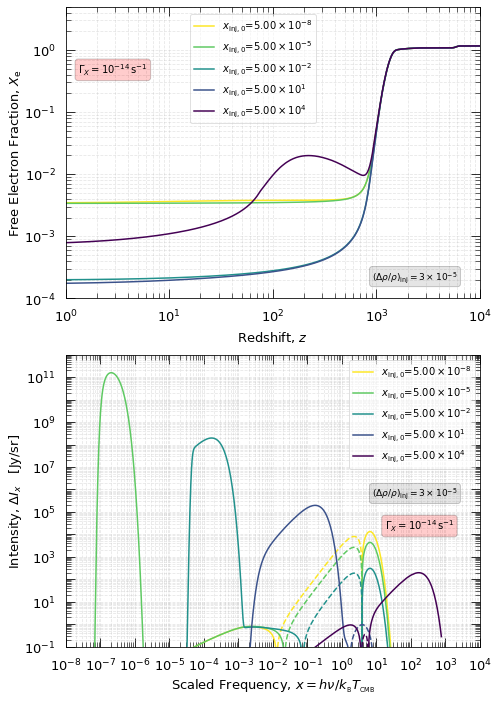

In [24]:
#fig, ax_array = plt.subplots(2,3,figsize=(30,20))
fig, (ax1,ax2) = plt.subplots(2,1,figsize=(7,10))
label_size = 13
title_size = 13
legend_size = 25
handle_length = 0.5

ax = ax1

ymin=1e-4
ymax = 5e0
x_max = 1e4
x_min = 1
ax.set_xlim(x_min,x_max)
ax.set_ylim(ymin,ymax)
ax.set_xscale('log')
ax.set_yscale('log')


ax.set_xlabel(label_redshift,size=title_size)
ax.set_ylabel(label_xe,size=title_size)
ax.yaxis.set_label_coords(-.1,0.5)


ax.yaxis.set_major_locator(LogLocator(numticks=15)) #(1)
ax.yaxis.set_minor_locator(LogLocator(numticks=15,subs=np.arange(2,10))) #(2)
for label in ax.yaxis.get_ticklabels()[::2]:
    label.set_visible(True) #(3)

ax.yaxis.set_tick_params(right='on',which='minor',direction='in',length=5)
ax.xaxis.set_tick_params(top='on',which='minor',direction='in',length=5)
ax.yaxis.set_tick_params(right='on',which='major',direction='in',length=9,labelsize=label_size,pad=10)
ax.xaxis.set_tick_params(top='on',which='major',direction='in',length=9,labelsize=label_size,pad=10)

# manipulate x-axis ticks and labels
ax.xaxis.set_major_locator(LogLocator(numticks=15)) #(1)
ax.xaxis.set_minor_locator(LogLocator(numticks=15,subs=np.arange(2,10))) #(2)
for label in ax.xaxis.get_ticklabels()[::2]:
    label.set_visible(True) #(3)

ax.grid( b=True, which="both", alpha=0.3, linestyle='--')
i = 0
color=iter(cm.viridis(np.linspace(1,0,len(xinj))))
for x in xinj:
    ax.plot(z[i],Xe[i],label=r'$x_\mathrm{inj,0}$='+sd.scientific_notation(xinj[i][0]),c=next(color))
    i+=1



ax.text(0.74, 0.1, r'$(\Delta \rho/\rho)_\mathrm{inj}=3\times10^{-5}$', transform=ax.transAxes, fontsize=9, verticalalignment='top',
          bbox=dict(boxstyle='round', facecolor='grey', alpha=0.2))


ax.text(0.03, 0.81, r'$\Gamma_X=$'+sd.scientific_notation(ct.ct_Gamma_dec)+r'$\,\mathrm{s}^{-1}$', transform=ax.transAxes, fontsize=10, verticalalignment='top',
          bbox=dict(boxstyle='round', facecolor='r', alpha=0.2))



ax.legend(loc=(0.3,0.6),ncol=1,frameon=True,framealpha=0.6,fontsize = 10)




ax = ax2

ymin=1e-1
ymax = 1e12
x_max = 1e4
x_min = 1e-8
ax.set_xlim(x_min,x_max)
ax.set_ylim(ymin,ymax)
ax.set_xscale('log')
ax.set_yscale('log')


ax.set_xlabel(label_scaled_frequency,size=title_size)
ax.set_ylabel(label_intensity,size=title_size)
ax.yaxis.set_label_coords(-.1,0.5)


ax.yaxis.set_major_locator(LogLocator(numticks=15)) #(1)
ax.yaxis.set_minor_locator(LogLocator(numticks=15,subs=np.arange(2,10))) #(2)
for label in ax.yaxis.get_ticklabels()[::2]:
    label.set_visible(False) #(3)

ax.yaxis.set_tick_params(right='on',which='minor',direction='in',length=5)
ax.xaxis.set_tick_params(top='on',which='minor',direction='in',length=5)
ax.yaxis.set_tick_params(right='on',which='major',direction='in',length=9,labelsize=label_size,pad=10)
ax.xaxis.set_tick_params(top='on',which='major',direction='in',length=9,labelsize=label_size,pad=10)

# manipulate x-axis ticks and labels
ax.xaxis.set_major_locator(LogLocator(numticks=15)) #(1)
ax.xaxis.set_minor_locator(LogLocator(numticks=15,subs=np.arange(2,10))) #(2)
for label in ax.xaxis.get_ticklabels()[::2]:
    label.set_visible(True) #(3)

ax.grid( b=True, which="both", alpha=0.3, linestyle='--')
i = 0
color=iter(cm.viridis(np.linspace(1,0,len(xinj))))

for x in xinj:
    col = next(color)
    ax.plot(x_ct[i],DI_ct[i],label=r'$x_\mathrm{inj,0}$='+sd.scientific_notation(xinj[i][0]),c=col)
    ax.plot(x_ct[i],-np.asarray(DI_ct[i]),ls='--',c=col)

    i+=1



ax.text(0.74, 0.55, r'$(\Delta \rho/\rho)_\mathrm{inj}=3\times10^{-5}$', transform=ax.transAxes, fontsize=9, verticalalignment='top',
          bbox=dict(boxstyle='round', facecolor='grey', alpha=0.2))


ax.text(0.77, 0.44, r'$\Gamma_X=$'+sd.scientific_notation(ct.ct_Gamma_dec)+r'$\,\mathrm{s}^{-1}$', transform=ax.transAxes, fontsize=10, verticalalignment='top',
          bbox=dict(boxstyle='round', facecolor='r', alpha=0.2))

ax.legend(loc=1,ncol=1,frameon=True,framealpha=0.6,fontsize = 10)



fig.tight_layout()





plt.savefig(path_to_figures + '/ct_Xe_and_DI_many_xinjs.pdf')
plt.show()
plt.close(fig)

# Run CosmoRec/Recfast++ in parallel and plot results

In [70]:
# initial setup of recfast

rf = sd.recfast()
rf.rf_zstart = 5e6
rf.rf_zend = 1e-5
rf.rf_include_correction_function = 1
rf.rf_Reionization_model = 0

rf.rf_T0 = 2.7255
rf.rf_Yp = 0.245407
rf.rf_N_eff = 3.046
rf.rf_Omega_m = 0.312331
rf.rf_Omega_b = 0.0491137
rf.rf_h = 0.675422


args = {}

p_name = 'T0'
fdm_array =  [2.4255,2.5255,2.6255,2.7255,2.8255]
p_array = fdm_array

args['param_values_array'] = p_array
args['param_name'] = p_name
args['save_recfast_results'] = 'no'

R = rf.run_recfast_parallel(**args)

In [71]:
# Now R contains everything we need:
R[3]

{'T0': 2.7255,
 'z': array([5.0000000e+06, 4.9500900e+06, 4.9001800e+06, ..., 1.0260183e-02,
        1.0129256e-02, 1.0000000e-05]),
 'Xe': array([1.1637747e+00, 1.1637747e+00, 1.1637747e+00, ..., 1.7394062e-04,
        1.7394011e-04, 1.7390017e-04])}

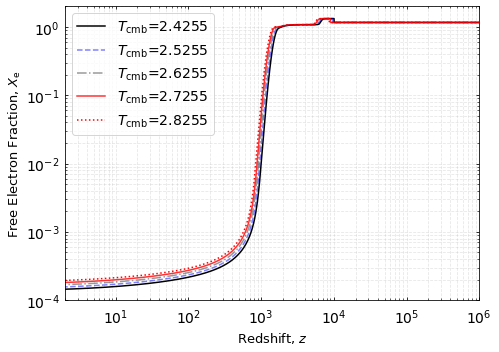

In [74]:
fig, ax = plt.subplots(1,1,figsize=(7,5))
label_size = 14
title_size = 13
legend_size = 25
handle_length = 1.5


z_asked = np.logspace(np.log10(1e-2),np.log10(60000),5000)


colors = iter(['k','b','k','r','r'])
alphas = iter([1.,0.5,.4,0.8,1.])
lss = iter(['-','--','-.','-',':',(0, (3, 1, 1, 1, 1, 1))])
labels = iter([r'$T_\mathrm{cmb}$=%.4f'%f for f in fdm_array])


for i in range(len(p_array)):
    col = next(colors)
    param =p_array[i]
    
    z = R[i]['z']
    xe = R[i]['Xe']
    
    ax.plot(z,xe,ls=next(lss),c=col,alpha = next(alphas),label=next(labels))#,c=col,ls=next(lss),alpha = next(alphas),label=next(labels))

x_min = 2.
x_max = 1.e6

ymin = 1.e-4
ymax = 2e0

ax.set_xlim(x_min,x_max)
ax.set_ylim(ymin,ymax)
ax.set_xscale('log')
ax.set_yscale('log')


ax.set_xlabel(label_redshift,size=title_size)
ax.set_ylabel(label_xe,size=title_size)


ax.yaxis.set_label_coords(-.1,0.5)

ax.yaxis.set_tick_params(right='on',which='minor',direction='in',length=2)
ax.xaxis.set_tick_params(top='on',which='minor',direction='in',length=2)
ax.yaxis.set_tick_params(right='on',which='major',direction='in',length=3,labelsize=label_size,pad=5)
ax.xaxis.set_tick_params(top='on',which='major',direction='in',length=3,labelsize=label_size,pad=7)

plt.setp(ax.get_yticklabels(), rotation='horizontal', fontsize=label_size)
plt.setp(ax.get_xticklabels(), fontsize=label_size)

ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')

ax.yaxis.set_major_locator(ticker.LogLocator(base=10.0, numticks=1000))
ax.xaxis.set_major_locator(ticker.LogLocator(base=10.0, numticks=1000))
locmin = ticker.LogLocator(base=10.0, subs=np.arange(2, 10) ,
                                      numticks=12)
ax.xaxis.set_minor_locator(locmin)
ax.yaxis.set_minor_locator(locmin)
ax.xaxis.set_minor_formatter(ticker.NullFormatter())
ax.yaxis.set_minor_formatter(ticker.NullFormatter())

ax.grid( b=True, which="both", alpha=0.3, linestyle='--')



ax.legend(loc=2,ncol=1,fontsize=14)

ax.loglog()

fig.tight_layout()
plt.savefig(path_to_figures + '/recfast_many_Tcmb.pdf')
plt.show()
plt.close(fig)


# Make a movie of spectra using the photon injection library

In [6]:
subprocess.call(['mkdir','-p',sd.path_to_sd_projects+'/specdist/specdist/data/ct_database'])

0

In [9]:
# copy the library folder 'case_extended_run_xe_history_Drho_rho_3e-5_zlate_1e3_without_collision_190820'
# to the ct_database directory (you need to downliad the library)
# then load the library:
# (this takes a couple of minutes, the libray is 5GB size)
sd_lib_extended_run = sd.specdist_ct_spectra_lib()
sd.load_ct_spectra_lib('extended_run_xe_history_Drho_rho_3e-5_zlate_1e3_without_collision_190820',sd_lib_extended_run)



In [ ]:

Gamma_values= np.logspace(-8,-17,70)
xdec_values = [1e-3]


for ig in range(len(xdec_values)):
    for ix in range(len(xdec_values)):
        gamma = Gamma_values[ix]
        str_gamma = str("%.3e"%gamma)
        print(str_gamma)
        xdec = xdec_values[ig]
        str_xdec = "%.3e"%xdec
        print(str_xdec)

        B_nu = np.vectorize(sd.B_nu_of_T)
        i = 0
        nx = len(Gamma_values)
        x = []
        y = []
        xinj = []
        gammainj = []
        fdm_values = []
        for k in range(nx):
            gamma = Gamma_values[k]
            xinj.append(xdec)
            gammainj.append(gamma)
            x_asked = np.logspace(np.log10(1e-8),np.log10(1e8),3000)


            S_pectra = sd.GetSpectra(gamma,xdec,x_asked,sd_lib_extended_run)
            x.append(S_pectra['x'])
            y.append(S_pectra['DI'])

        x_min = 1.e-7
        x_max = 1.e3

        fig, ax1 = plt.subplots(1,1,figsize=(8,6))
        label_size = 15
        title_size = 20
        legend_size = 25
        handle_length = 1.5

        ymin = 1.e-2
        ymax = 2e11


        linesp = []
        patches = []


        i_ax = 0
        firas = sd.firas()


        for ax in [ax1]:
            ax.set_xlim(x_min,x_max)
            ax.set_ylim(ymin,ymax)
            ax.set_xscale('log')
            ax.set_yscale('log')

            ax.set_xlabel(label_scaled_frequency,size=title_size)
            ax.set_ylabel(label_intensity,size=title_size)
            ax.yaxis.set_label_coords(-.1,0.5)


            ax.tick_params(axis = 'x',which='both',length=5,direction='in', pad=10)
            ax.tick_params(axis = 'y',which='both',length=5,direction='in', pad=10)

            plt.setp(ax.get_yticklabels(), rotation='horizontal', fontsize=label_size)
            plt.setp(ax.get_xticklabels(), fontsize=label_size)

            ax.xaxis.set_ticks_position('both')
            ax.yaxis.set_ticks_position('both')


            ax.axvspan(1.e-3, 2e-3, facecolor='blue', alpha=0.2,label=r'$\mathrm{EDGES}$')
            ax.axvspan(0.5, 105, facecolor='orange', alpha=0.2,label=r'$\mathrm{PIXIE}$')
            ax.axvspan(1.2, 11.2, facecolor='red', alpha=0.2,label=r'$\mathrm{FIRAS}$')

            x_asked = np.logspace(np.log10(x_min),np.log10(x_max),1000)

            bnu = B_nu(x_asked*sd.kb*sd.firas_T0_bf/sd.hplanck,sd.firas_T0_bf)*1e6
            ax.plot(x_asked,bnu,c='grey',ls=':',label='Black Body at T=2.725K')

            Y = sd.GetYSpecDistAtTandX(firas.firas_y_1996_95_cl,sd.firas_T0_bf,x_asked)*1e6
            ax.plot(x_asked,Y,c='r',alpha = 0.2,label = label_y_firas)
            ax.plot(x_asked,-Y,c='r',ls='--',alpha = 0.4)

            MU_chluba = sd.GetMuSpecDistAtTandX_chluba(firas.firas_mu_1996_95_cl,sd.firas_T0_bf,x_asked)*1e6
            ax.plot(x_asked,MU_chluba,c='magenta',alpha = 0.2,label=label_mu_firas)
            ax.plot(x_asked,-MU_chluba,c='magenta',ls='--',alpha = 0.4)

            ax.yaxis.set_major_locator(LogLocator(numticks=15)) 
            ax.yaxis.set_minor_locator(LogLocator(numticks=15,subs=np.arange(2,10))) 
            for label in ax.yaxis.get_ticklabels()[::2]:
                label.set_visible(True) 

            ax.yaxis.set_tick_params(right='on',which='minor',direction='in',length=5)
            ax.xaxis.set_tick_params(top='on',which='minor',direction='in',length=5)
            ax.yaxis.set_tick_params(right='on',which='major',direction='in',length=9,labelsize=label_size,pad=10)
            ax.xaxis.set_tick_params(top='on',which='major',direction='in',length=9,labelsize=label_size,pad=10)

            ax.xaxis.set_major_locator(LogLocator(numticks=15)) 
            ax.xaxis.set_minor_locator(LogLocator(numticks=15,subs=np.arange(2,10))) 
            for label in ax.xaxis.get_ticklabels()[::2]:
                label.set_visible(True) 

            ax.grid( b=True, which="both", alpha=0.3, linestyle='--')    
            ax.legend(loc=1)


            i_ax = i_ax + 1


        linesp1 = [ax1.plot([], [],c='k',ls='-')[0] for _ in range(1)]
        linesm1 = [ax1.plot([], [],c='k',ls='--')[0] for _ in range(1)]
        text_gamma =  [ax.text(0.05, 0.15, r'$z= %.4e$'%1, transform=ax.transAxes, fontsize=14, verticalalignment='top',
                      bbox=dict(boxstyle='round', facecolor='white', alpha=0.5))]
        patches1 = linesp1 +linesm1 + text_gamma 


        patches = patches1




        def init():

            for line in linesp1:
                line.set_data([], [])

            return patches

        def animate(i):
            for j,line in enumerate(linesp1):
                if j==0:
                    line.set_data(x[i],y[i])
            for j,line in enumerate(linesm1):
                if j==0:
                    line.set_data(x[i],-y[i])
                text_gamma[j].remove()
                einj = xinj_to_Einj*xdec
                text_gamma_str1 = r'$z=0$'
                text_gamma_str2 = r'$E_\mathrm{inj}=$'+ sd.scientific_notation(einj)+' '+r'$\mathrm{eV}$'
                text_gamma_str3 = r'$x_\mathrm{inj,0}=$'+ sd.scientific_notation(xinj[i])
                text_gamma_str4 = r'$\Gamma_X=$'+ sd.scientific_notation(gammainj[i])+' '+r'$\mathrm{s}^{-1}$'
                text_gamma_str = '\n'.join((text_gamma_str4,
                                            text_gamma_str3,
                                            text_gamma_str2,
                                            text_gamma_str1))

                text_gamma[j] = ax.text(0.35, 0.95, text_gamma_str , transform=ax.transAxes, fontsize=12, verticalalignment='top',
                      bbox=dict(boxstyle='round', facecolor='white', alpha=0.5))

            return patches


        fig.tight_layout()




        anim = animation.FuncAnimation(fig, animate, init_func=init,
                                       frames=len(y), interval=800, blit=True)

        anim.save(path_to_figures + '/Dn_today_movie_Drho_rho_3e-5_xinj_'+str_xdec+'.mp4', fps=3, extra_args=['-vcodec', 'libx264'],dpi=100)
        i+=1

1.000e-08
1.000e-03


/Users/boris/anaconda3/lib/python3.7/site-packages/specdist-0.1-py3.7.egg/specdist/standard_mu_and_y_distortions.py:21: RuntimeWarning: invalid value encountered in double_scalars
  result = B_nu_of_T(NU,T)/T*(hplanck*NU/kb/T)*np.exp(hplanck*NU/kb/T)/(np.exp(hplanck*NU/kb/T)-1.)
